In [1]:
from itertools import chain
from unicodedata import name
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Initialize the important variables


In [2]:
# get the data
myData = pd.read_json("transaction-data-adhoc-analysis.json")
df = pd.DataFrame(myData)

In [3]:
# Testing
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [4]:
#Initialize Other Variables

In [5]:
# Will be needed to add columns later in the DataFrame
products = ['Beef Chicharon','Kimchi and Seaweed','Nutrional Milk','Gummy Vitamins','Yummy Vegetables','Orange Beans','Gummy Worms']
months = ['January', "February", "March", "April", "May", "June", "July", 'August', 'September', 'October', 'November', 'December']

In [6]:
# Convert the strings to DateTime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [7]:
# Since Months Are important, we'll create a month column
df['month'] = df["transaction_date"].dt.month_name()

In [9]:
# Testing
df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month
0,USNS Wagner\nFPO AE 00917,1926-03-11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022-01-12,January
1,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022-01-12,January
2,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022-01-08,January
3,USCGC Benson\nFPO AP 48794,2016-07-08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022-01-10,January
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949-09-27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022-01-24,January
...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019-10-26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022-06-05,June
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022-06-12,June
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022-06-15,June
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913-11-04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022-06-09,June


In [10]:
# Separate Items by ';' to create a list of bought item in one transaction
df["transaction_items"] = df["transaction_items"].str.split(';')


In [11]:
# explode or "un-nest" the transaction_items column
df = df.explode('transaction_items')

In [12]:
# Create a Quantity column

In [13]:
# Get the Quantity of items the format is (x#)
# Basically removes the '(x' [hence -2] and ')' [hence -1]
df['Quantity'] = df["transaction_items"].str[-2:-1]

In [14]:
# convert "Quantity" to int
df["Quantity"] = df["Quantity"].astype('int')

In [15]:
# Create a new column product initialized with their corresponding buyer
df.loc[df['transaction_items'].str.contains(products[0]), ['product']]=products[0]
df.loc[df['transaction_items'].str.contains(products[1]), ['product']]=products[1]
df.loc[df['transaction_items'].str.contains(products[2]), ['product']]=products[2]
df.loc[df['transaction_items'].str.contains(products[3]), ['product']]=products[3]
df.loc[df['transaction_items'].str.contains(products[4]), ['product']]=products[4]
df.loc[df['transaction_items'].str.contains(products[5]), ['product']]=products[5]
df.loc[df['transaction_items'].str.contains(products[6]), ['product']]=products[6]

In [16]:
# Create months
df['month'] = df["transaction_date"].dt.month_name()
pt_0 = df.pivot_table(index = "product", columns = "month", values = 'Quantity', aggfunc='sum')
pt_1 = df.pivot_table(index = "product", columns = "month", values = 'transaction_value', aggfunc='sum')

In [25]:
print(pt_0.head(20))

month               April  February  January   June  March    May
product                                                          
Beef Chicharon       9890     10001     9665   9902   9816  10028
Gummy Vitamins       9842      9980     9681   9980  10145   9948
Gummy Worms         10043      9996     9559   9934   9986   9801
Kimchi and Seaweed   9921      9949     9676  10104   9967   9773
Nutrional Milk       9786      9691     9727   9767   9876   9881
Orange Beans         9914     10037     9774  10106   9611   9964
Yummy Vegetables     9861     10256     9959   9722   9896   9735


In [23]:
print(pt_1.head(20))

month                  April  February   January      June     March       May
product                                                                       
Beef Chicharon      24298117  24475313  23537471  24466423  24208956  24425935
Gummy Vitamins      25881223  25721397  24928516  25995105  26336301  25876852
Gummy Worms         15662068  15439312  14451956  14979166  15391597  15121334
Kimchi and Seaweed  20402864  20334018  20024684  21109736  20418772  20178178
Nutrional Milk      29493222  28892984  28791619  28967253  29457128  29736940
Orange Beans        15528842  15448301  15145758  15993046  15411277  15560870
Yummy Vegetables    17791119  18403632  18014304  17427607  18050205  18041692


In [18]:
df_tS_0 = pd.DataFrame(
    {
        months[0]:pt_1[months[0]].values,
        months[1]:pt_1[months[1]].values,
        months[2]:pt_1[months[2]].values,
        months[3]:pt_1[months[3]].values,
        months[4]:pt_1[months[4]].values,
        months[5]:pt_1[months[5]].values,
    },
    index=[
        products[0],
        products[1],
        products[2],
        products[3],
        products[4],
        products[5],
        products[6]
    ]
)

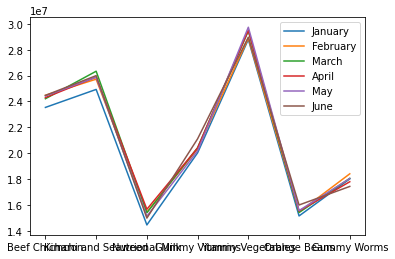

In [19]:
df_tS_0.plot.line()
plt.show()

In [20]:
df_tS_1 = pd.DataFrame(
    {
        months[0]:pt_0[months[0]].values,
        months[1]:pt_0[months[1]].values,
        months[2]:pt_0[months[2]].values,
        months[3]:pt_0[months[3]].values,
        months[4]:pt_0[months[4]].values,
        months[5]:pt_0[months[5]].values,
    },
    index=[
        products[0],
        products[1],
        products[2],
        products[3],
        products[4],
        products[5],
        products[6]
    ]
)

In [21]:
print(df_tS_1.head())

                    January  February  March  April    May   June
Beef Chicharon         9665     10001   9816   9890  10028   9902
Kimchi and Seaweed     9681      9980  10145   9842   9948   9980
Nutrional Milk         9559      9996   9986  10043   9801   9934
Gummy Vitamins         9676      9949   9967   9921   9773  10104
Yummy Vegetables       9727      9691   9876   9786   9881   9767


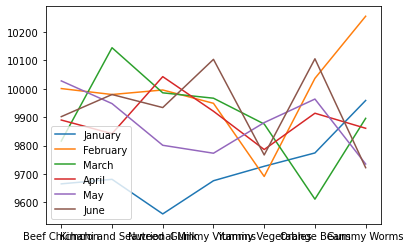

In [22]:
df_tS_1.plot.line()
plt.show()